In [7]:
import pandas as pd

df = pd.read_csv('applications_extended.csv')

In [10]:
df.head()

,EP ID,Application ID,Opportunity ID,Home LC,Home MC,Host LC,Host MC,Status,Product,Current Status,Applied Date,Approved Date,Accepted Date,Realized Date,Experience End Date
0,2166391,6120700,1272095,USJ,Egypt,AAST Alexandria,Egypt,withdrawn,8,withdrawn,2021-03-16T11:03:36Z,NaN,NaN,NaN,NaN
1,3424247,6120704,1270359,KANDY,Hong Kong,HKUST,Hong Kong,rejected,8,rejected,2021-03-16T11:06:28Z,NaN,NaN,NaN,NaN
2,1221949,6120616,1271957,MC Sri Lanka,Egypt,GUC,Egypt,rejected,9,rejected,2021-03-16T08:25:17Z,NaN,NaN,NaN,NaN
3,1221949,6120615,1271736,MC Sri Lanka,Egypt,Damietta,Egypt,rejected,9,rejected,2021-03-16T08:24:23Z,NaN,NaN,NaN,NaN
4,4451206,6120828,1270062,USJ,India,M.A.H.E.,India,rejected,8,rejected,2021-03-16T14:03:19Z,NaN,NaN,NaN,NaN


In [11]:
df = df.drop('Home MC', axis=1)


In [12]:
df.head()

,EP ID,Application ID,Opportunity ID,Home LC,Host LC,Host MC,Status,Product,Current Status,Applied Date,Approved Date,Accepted Date,Realized Date,Experience End Date
0,2166391,6120700,1272095,USJ,AAST Alexandria,Egypt,withdrawn,8,withdrawn,2021-03-16T11:03:36Z,NaN,NaN,NaN,NaN
1,3424247,6120704,1270359,KANDY,HKUST,Hong Kong,rejected,8,rejected,2021-03-16T11:06:28Z,NaN,NaN,NaN,NaN
2,1221949,6120616,1271957,MC Sri Lanka,GUC,Egypt,rejected,9,rejected,2021-03-16T08:25:17Z,NaN,NaN,NaN,NaN
3,1221949,6120615,1271736,MC Sri Lanka,Damietta,Egypt,rejected,9,rejected,2021-03-16T08:24:23Z,NaN,NaN,NaN,NaN
4,4451206,6120828,1270062,USJ,M.A.H.E.,India,rejected,8,rejected,2021-03-16T14:03:19Z,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['EP ID', 'Application ID', 'Opportunity ID', 'Home LC', 'Host LC',
       'Host MC', 'Status', 'Product', 'Current Status', 'Applied Date',
       'Approved Date', 'Accepted Date', 'Realized Date',
       'Experience End Date'],
      dtype='object')

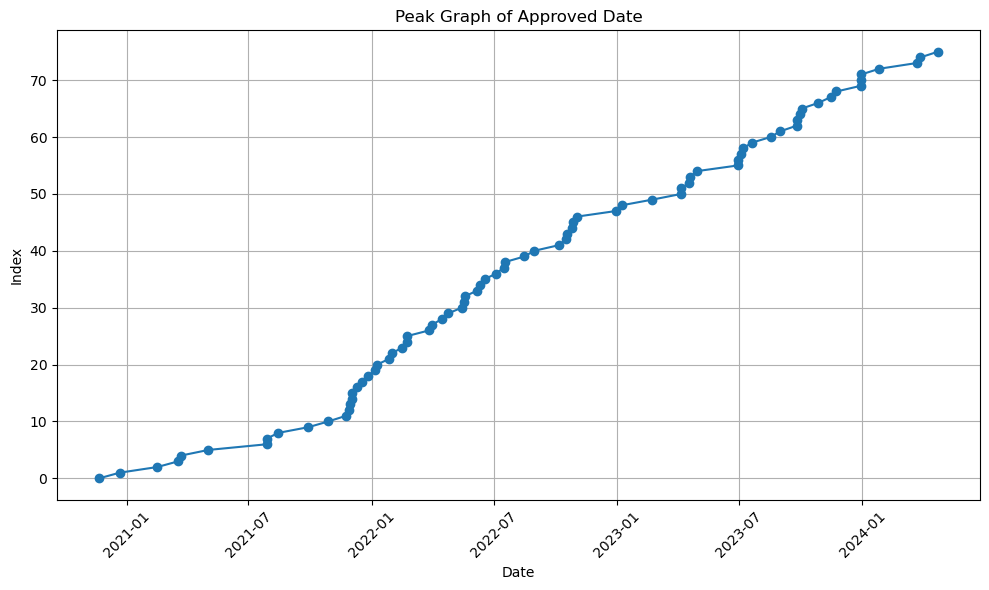

In [19]:
import matplotlib.pyplot as plt
# Convert 'Approved Date' column to datetime
df['Approved Date'] = pd.to_datetime(df['Approved Date'])
df.dropna(subset=['Approved Date'], inplace=True)
# Sort DataFrame by 'Approved Date'
df.sort_values(by='Approved Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Approved Date'], range(len(df)), marker='o', linestyle='-')
plt.title('Peak Graph of Approved Date')
plt.xlabel('Date')
plt.ylabel('Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [20]:
import pandas as pd
import plotly.graph_objs as go

##
# Convert 'Approved Date' column to datetime
df['Approved Date'] = pd.to_datetime(df['Approved Date'])

# Drop NaN values from 'Approved Date' column
df.dropna(subset=['Approved Date'], inplace=True)

# Sort DataFrame by 'Approved Date'
df.sort_values(by='Approved Date', inplace=True)

# Create Plotly figure
fig = go.Figure()

# Add trace for the Approved Date
fig.add_trace(go.Scatter(x=df['Approved Date'], y=list(range(len(df))), mode='lines+markers'))

# Update layout for better interactivity
fig.update_layout(
    title='Peak Graph of Approved Date',
    xaxis_title='Date',
    yaxis_title='Index',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Show the plot
fig.show()

ValueError: 
    Invalid value of type 'builtins.range' received for the 'y' property of scatter
        Received value: range(0, 76)

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series